In [2]:
import pandas as pd

# Load the dataset
file_path = '/kaggle/input/healthcare-insurance/insurance.csv'  # Update the path as necessary
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


**Checking for Nulls**

In [3]:
# Check for missing values
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [6]:
# Display the column names of the dataset
print(df.columns)


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [8]:
from sklearn.preprocessing import StandardScaler

# Scaling 'age' and 'bmi'
scaler = StandardScaler()
df[['age', 'bmi']] = scaler.fit_transform(df[['age', 'bmi']])


In [9]:
# Define features (all columns except 'charges') and target ('charges')
X = df.drop('charges', axis=1)  # Features
y = df['charges']               # Target (Premium Price)


In [10]:
# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Define features and target again after encoding
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')


Mean Squared Error: 33596915.85136147
R-squared Score: 0.7835929767120723


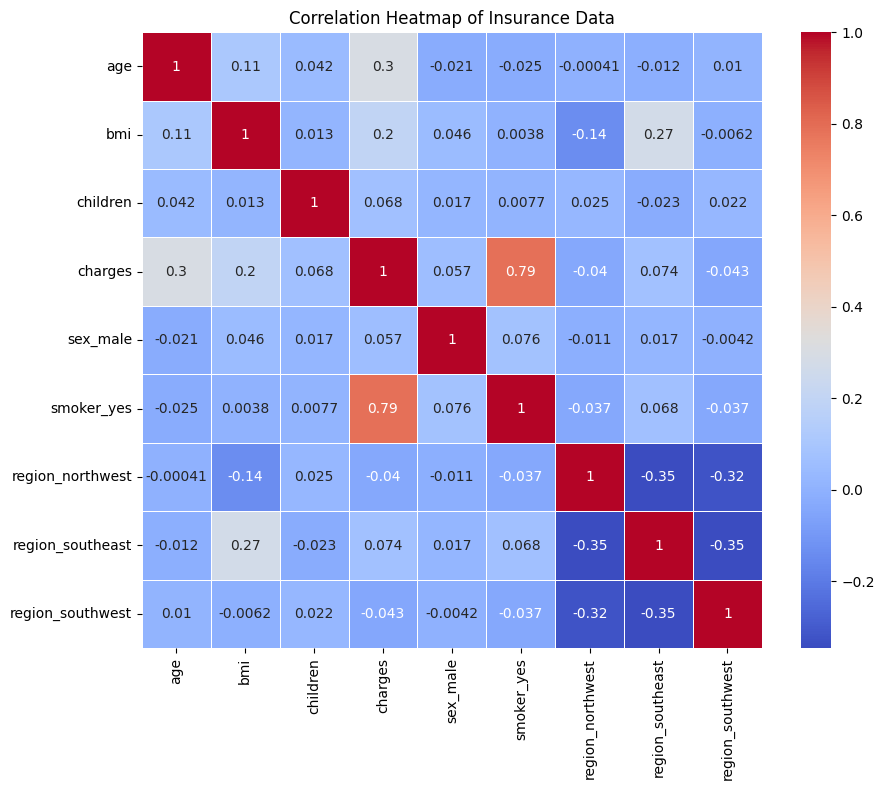

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
# Create a correlation matrix
corr_matrix = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Insurance Data')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


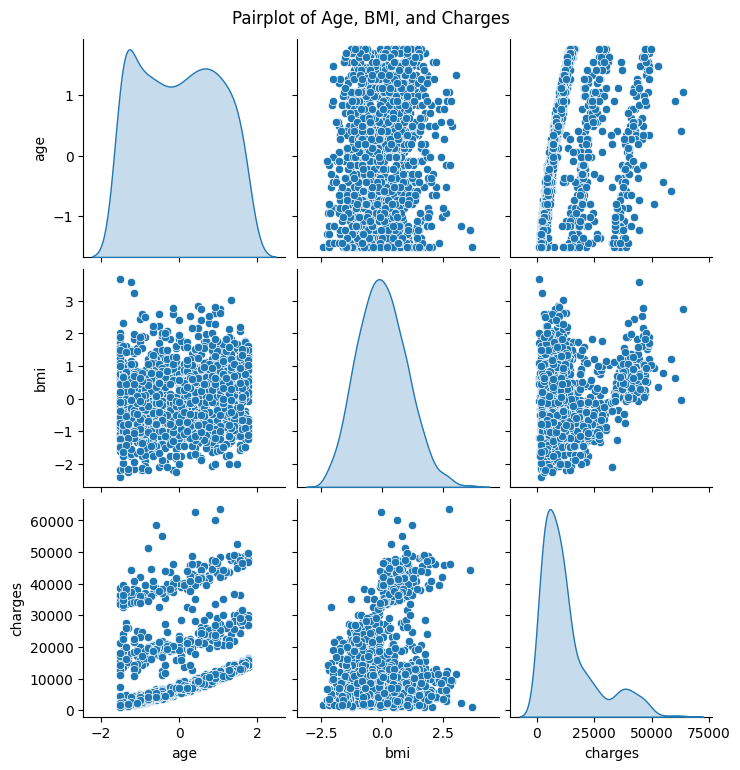

In [13]:
# Pair plot to visualize relationships between age, bmi, and charges
sns.pairplot(df, vars=['age', 'bmi', 'charges'], kind='scatter', diag_kind='kde')
plt.suptitle('Pairplot of Age, BMI, and Charges', y=1.02)
plt.show()


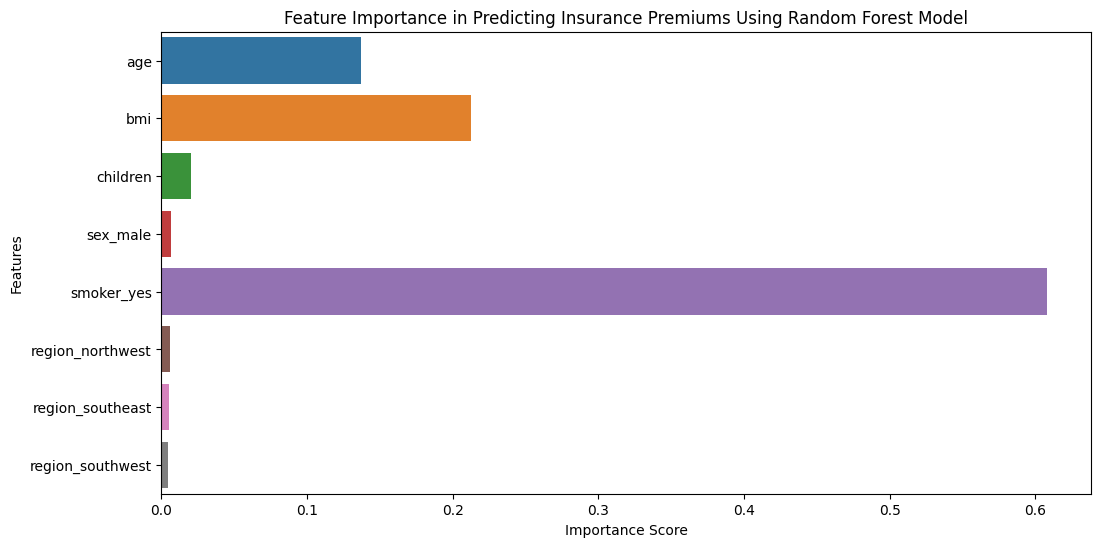

In [20]:
# Plot the distribution of charges
plt.figure(figsize=(12, 6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance in Predicting Insurance Premiums Using Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()
